# <span style ='color:#0A1172'>DHHS Chronic Disease Indicators: Cancer Prevalance Analysis
## <span style ='color:#59788E'> <bu>EXPLORATORY NOTEBOOK</bu>

- <span style ='color:#016064'>by Annie Carter
- <span style ='color:#016064'>Sourced by U.S. Department of Health & Human Services

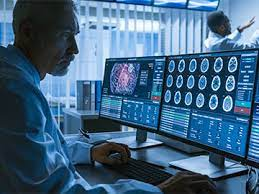

 Custom Palette = Navy #0A1172, Stone #59788E, Ocean #757C88, Berry #241571

In [1]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import os
import datetime


## <span style ='color:#241571'>ACQUIRE

In [2]:
# Save and read dataset csv from https://catalog.data.gov/dataset/u-s-chronic-disease-indicators-cdi
df = pd.read_csv('U.S._Chronic_Disease_Indicators__CDI_.csv')

/var/folders/0f/gkm6knzn3fscjt7dxlgc9k5h0000gn/T/ipykernel_44983/2347781156.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('U.S._Chronic_Disease_Indicators__CDI_.csv')


In [3]:
# Review shape to determine processing needs, will use sample size due to network restrictions for exploration
df.shape

(1185676, 34)

In [4]:
#Review data to look at columns datatypes and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185676 entries, 0 to 1185675
Data columns (total 34 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   YearStart                  1185676 non-null  int64  
 1   YearEnd                    1185676 non-null  int64  
 2   LocationAbbr               1185676 non-null  object 
 3   LocationDesc               1185676 non-null  object 
 4   DataSource                 1185676 non-null  object 
 5   Topic                      1185676 non-null  object 
 6   Question                   1185676 non-null  object 
 7   Response                   0 non-null        float64
 8   DataValueUnit              1033553 non-null  object 
 9   DataValueType              1185676 non-null  object 
 10  DataValue                  806942 non-null   object 
 11  DataValueAlt               804578 non-null   float64
 12  DataValueFootnoteSymbol    393710 non-null   object 
 13  DatavalueFoo

In [6]:
# Quick review of data in columns started with 40 then transpose for readiability with head of 5
df.head().T

,0,1,2,3,4
YearStart,2014,2018,2018,2017,2010
YearEnd,2014,2018,2018,2017,2010
LocationAbbr,AR,CO,DC,GA,MI
LocationDesc,Arkansas,Colorado,District of Columbia,Georgia,Michigan
DataSource,SEDD; SID,SEDD; SID,SEDD; SID,SEDD; SID,SEDD; SID
Topic,Asthma,Asthma,Asthma,Asthma,Asthma
Question,Hospitalizations for asthma,Hospitalizations for asthma,Hospitalizations for asthma,Hospitalizations for asthma,Hospitalizations for asthma
Response,NaN,NaN,NaN,NaN,NaN
DataValueUnit,NaN,NaN,NaN,NaN,NaN
DataValueType,Number,Number,Number,Number,Number


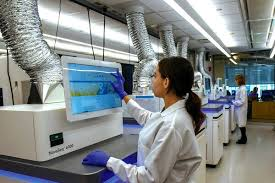

## <span style ='color:#241571'>PREPARE
Reduced sample dataframe to 100K to rapidly review and clean. 

In [7]:
#created sample DF with random state of 42 to review and clean data rapidly
df_sample= df.sample(n=100000, random_state=42)


In [12]:
# List of columns to remove. 
columns_to_remove = ['YearEnd', 'Response', 'StratificationCategory2', 'Stratification2', 'StratificationCategory3',
                     'Stratification3', 'ResponseID', 'StratificationCategoryID2', 'StratificationID2',
                     'StratificationCategoryID3', 'StratificationID3','DataValueTypeID','QuestionID', 'TopicID','LocationID','HighConfidenceLimit','LowConfidenceLimit','YearEnd','LocationDesc','DataValueUnit','DataValueType','DataValueAlt','DataValueFootnoteSymbol','DatavalueFootnote','StratificationCategoryID1','StratificationID1','Question','DataSource']

# Drop the specified columns from the DataFrame
df_sample = df_sample.drop(columns_to_remove, axis=1)

In [19]:
 df_sample = df_sample.rename(columns={'YearStart':'Year', 'Stratification1':'Demographics','GeoLocation':'Geo Location', 'DataValue':'Data Value', 'LocationAbbr' : 'State Abbr','Topic': 'Disease'})


In [20]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185676 entries, 0 to 1185675
Data columns (total 7 columns):
 #   Column                   Non-Null Count    Dtype 
---  ------                   --------------    ----- 
 0   Year                     1185676 non-null  int64 
 1   State Abbr               1185676 non-null  object
 2   Disease                  1185676 non-null  object
 3   Data Value               806942 non-null   object
 4   StratificationCategory1  1185676 non-null  object
 5   Demographics             1185676 non-null  object
 6   Geo Location             1175510 non-null  object
dtypes: int64(1), object(6)
memory usage: 63.3+ MB


In [14]:
df_sample.Demographics.value_counts()

Overall                             166332
White, non-Hispanic                 147244
Hispanic                            147199
Black, non-Hispanic                 146984
Female                              140479
Male                                140477
Multiracial, non-Hispanic            85241
Other, non-Hispanic                  85241
American Indian or Alaska Native     63150
Asian or Pacific Islander            60062
Asian, non-Hispanic                   3267
Name: Demographics, dtype: int64

In [16]:
#Sample size has a equal distribution by US State and terroritory Reviewed during initial exploration using .head(20)
df_sample['State Abbr'].value_counts().head(2)

WI    22556
NY    22556
Name: State Abbr, dtype: int64

In [21]:
df_sample['Disease'].value_counts()

Cancer                                             176339
Cardiovascular Disease                             157750
Diabetes                                           156808
Chronic Obstructive Pulmonary Disease              152874
Asthma                                              80342
Arthritis                                           78300
Nutrition, Physical Activity, and Weight Status     75418
Overarching Conditions                              73260
Alcohol                                             66091
Tobacco                                             59396
Older Adults                                        26316
Chronic Kidney Disease                              24731
Oral Health                                         22273
Mental Health                                       13200
Immunization                                         9570
Reproductive Health                                  9086
Disability                                           3922
Name: Disease,

In [22]:
# List of values to remove from the 'Topic' column
values_to_remove = ['Asthma', 'Arthritis', 'Nutrition, Physical Activity, and Weight Status', 'Overarching Conditions','Alcohol','Tobacco','Chronic Kidney Disease','Older Adults','Oral Health','Mental Health','Immunization','Reproductive Health','Disability']

# Drop rows with specific values from the 'Topic' column
df_sample = df_sample.drop(df_sample[df_sample['Disease'].isin(values_to_remove)].index)

df_sample.Disease.value_counts()


Cancer                                   176339
Cardiovascular Disease                   157750
Diabetes                                 156808
Chronic Obstructive Pulmonary Disease    152874
Name: Disease, dtype: int64

In [23]:
# Will use Cancer to create one-hot code "dummy" value for prevalaence \n"Yes_cancer" and Cardiovascular Disease, Diabetes & COPD \n . I will remove other Topics reduce date to  
# Create a dummy variable for the 'Topic' column
df_sample['Yes_cancer'] = np.where(df_sample['Disease'] == 'Cancer', 1, 0).astype(int)

# Drop the original 'Topic' column
df_sample.drop('Disease', axis=1, inplace=True)

df_sample.head()

,Year,State Abbr,Data Value,StratificationCategory1,Demographics,Geo Location,Yes_cancer
29,2008,NY,329,Gender,Male,POINT (-75.54397042699964 42.82700103200045),1
30,2009,NY,336,Gender,Male,POINT (-75.54397042699964 42.82700103200045),1
31,2011,NY,344,Gender,Male,POINT (-75.54397042699964 42.82700103200045),1
32,2012,NY,354,Gender,Male,POINT (-75.54397042699964 42.82700103200045),1
33,2012,CO,454,Overall,Overall,POINT (-106.13361092099967 38.843840757000464),1


In [ ]:
#Find nulls
df_sample.isnull().sum()

In [24]:
df_sample.dropna(subset=['Geo Location','Data Value'], inplace=True)

In [25]:
df_sample.isnull().sum()

Year                       0
State Abbr                 0
Data Value                 0
StratificationCategory1    0
Demographics               0
Geo Location               0
Yes_cancer                 0
dtype: int64

In [26]:
df_sample.shape

(417362, 7)

In [27]:
df_sample.drop_duplicates(inplace=True)

In [28]:
#Find duplicates
df_sample.duplicated().sum()

0

In [29]:
df_sample.head(2)

,Year,State Abbr,Data Value,StratificationCategory1,Demographics,Geo Location,Yes_cancer
29,2008,NY,329,Gender,Male,POINT (-75.54397042699964 42.82700103200045),1
30,2009,NY,336,Gender,Male,POINT (-75.54397042699964 42.82700103200045),1


In [30]:
# Create a new column 'Race/Ethnicity' based on the condition
df_sample['Race/Ethnicity'] = np.where(df_sample.StratificationCategory1 == 'Race/Ethnicity', df_sample.Demographics, '')

df_sample.head(2)



,Year,State Abbr,Data Value,StratificationCategory1,Demographics,Geo Location,Yes_cancer,Race/Ethnicity
29,2008,NY,329,Gender,Male,POINT (-75.54397042699964 42.82700103200045),1,
30,2009,NY,336,Gender,Male,POINT (-75.54397042699964 42.82700103200045),1,


In [31]:
# Create a new column 'Race/Ethnicity' based on the condition
df_sample['Gender'] = np.where(df_sample.StratificationCategory1 == 'Gender', df_sample.Demographics, '')

df_sample.head(2)


,Year,State Abbr,Data Value,StratificationCategory1,Demographics,Geo Location,Yes_cancer,Race/Ethnicity,Gender
29,2008,NY,329,Gender,Male,POINT (-75.54397042699964 42.82700103200045),1,,Male
30,2009,NY,336,Gender,Male,POINT (-75.54397042699964 42.82700103200045),1,,Male


In [32]:
# Will use Female to create one-hot code "dummy" value for "female" 
df_sample['Yes_female'] = np.where(df_sample['Gender'] == 'Female', 1, 0).astype(int)

# # Drop the original 'Topic' column
# df_sample.drop('Topic', axis=1, inplace=True)

df_sample.head(2)

,Year,State Abbr,Data Value,StratificationCategory1,Demographics,Geo Location,Yes_cancer,Race/Ethnicity,Gender,Yes_female
29,2008,NY,329,Gender,Male,POINT (-75.54397042699964 42.82700103200045),1,,Male,0
30,2009,NY,336,Gender,Male,POINT (-75.54397042699964 42.82700103200045),1,,Male,0


In [33]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402963 entries, 29 to 1185638
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Year                     402963 non-null  int64 
 1   State Abbr               402963 non-null  object
 2   Data Value               402963 non-null  object
 3   StratificationCategory1  402963 non-null  object
 4   Demographics             402963 non-null  object
 5   Geo Location             402963 non-null  object
 6   Yes_cancer               402963 non-null  int64 
 7   Race/Ethnicity           402963 non-null  object
 8   Gender                   402963 non-null  object
 9   Yes_female               402963 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 33.8+ MB


In [34]:
df_sample['Yes_female'].astype(str)

29         0
30         0
31         0
32         0
33         0
          ..
1185467    0
1185556    0
1185594    0
1185604    0
1185638    0
Name: Yes_female, Length: 402963, dtype: object

In [35]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402963 entries, 29 to 1185638
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Year                     402963 non-null  int64 
 1   State Abbr               402963 non-null  object
 2   Data Value               402963 non-null  object
 3   StratificationCategory1  402963 non-null  object
 4   Demographics             402963 non-null  object
 5   Geo Location             402963 non-null  object
 6   Yes_cancer               402963 non-null  int64 
 7   Race/Ethnicity           402963 non-null  object
 8   Gender                   402963 non-null  object
 9   Yes_female               402963 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 33.8+ MB


In [ ]:
# # Replace blank spaces with -1
# # df_sample['Gender'] = df_sample['Gender'].str.strip().replace('', '-1')
# df_sample['Gender'] = df_sample['Gender'].str.strip().replace('NaN', '-1').astype(int)



In [37]:
# Get the value counts of 'Cancer' topic
male_value_counts = df_sample[df_sample['Demographics'] == 'Male']['Demographics'].value_counts()
male_value_counts 

Male    63008
Name: Demographics, dtype: int64

In [38]:
# Get the value counts of 'Cancer' topic
female_value_counts = df_sample[df_sample['Demographics'] == 'Female']['Demographics'].value_counts()
female_value_counts 

Female    65177
Name: Demographics, dtype: int64

In [39]:
df_sample.Yes_female.value_counts()

0    337786
1     65177
Name: Yes_female, dtype: int64

In [40]:
# Get the value counts of 'Cancer' topic in the 'Stratification1' column
demographic_value_counts = df_sample['Demographics'].value_counts()
demographic_value_counts 


Overall                             70686
White, non-Hispanic                 67849
Female                              65177
Male                                63008
Black, non-Hispanic                 44729
Hispanic                            37524
Asian or Pacific Islander           23818
American Indian or Alaska Native    17823
Other, non-Hispanic                  7873
Multiracial, non-Hispanic            4476
Name: Demographics, dtype: int64

In [ ]:
# Get the value counts of 'Cancer' topic in the 'Stratification1' column
demographic_value_counts_with_cancer = df_sample[df_sample['Yes_cancer'] == 1]['Demographics'].value_counts()
demographic_value_counts_with_cancer

In [41]:
# Get the value counts of 'Cancer' topic
cancer_value_counts = df_sample['Yes_cancer'].value_counts()
cancer_value_counts

0    281829
1    121134
Name: Yes_cancer, dtype: int64

In [42]:
total_with_cancer = (df_sample['Yes_cancer'] == 1).sum()
total_with_cancer

121134

In [43]:
df_sample['Data Value'] = df_sample['Data Value'].astype(float).round().astype(int)




In [44]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402963 entries, 29 to 1185638
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Year                     402963 non-null  int64 
 1   State Abbr               402963 non-null  object
 2   Data Value               402963 non-null  int64 
 3   StratificationCategory1  402963 non-null  object
 4   Demographics             402963 non-null  object
 5   Geo Location             402963 non-null  object
 6   Yes_cancer               402963 non-null  int64 
 7   Race/Ethnicity           402963 non-null  object
 8   Gender                   402963 non-null  object
 9   Yes_female               402963 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 33.8+ MB


In [ ]:
Data Value Row
# Function to split a row by its value and insert new rows
def split_row_by_value(df_sample, column_name):
    for idx, row in df_sample.iterrows():
        value_to_split = row['DataValue']
        if isinstance(value_to_split, int) and value_to_split > 1:
            new_rows = [row] * (value_to_split - 1)
            new_values = range(1, value_to_split)
            for i, value in enumerate(new_values):
                new_rows[i]['DataValue'] = value
            expand_df = pd.concat([df_sample.drop(idx), pd.DataFrame(new_rows)], ignore_index=True)
    return expand_df






In [ ]:
# expand_df = split_row_by_value(df_sample, 'DataValue')
# expand_df.info()

### <span style ='color:#016064'>PREPARATION SUMMARY
After starting with original dataset of 1M+ I reduced it to 100K to rapidly clean and prepare for MVP. The data appeared to be distrubuted equally between states and within the 4 chronic diseases selected overall. If 10675 is too small. I can revert to original dataset using the same preparation used on the 100K df_sample. 

### <span style ='color:#016064'>PREPRATION FUNCTIONS FOR FINAL NOTEBOOK 

In [45]:
def prep_cdi(df):
    ''' 
     The below functions prepares DHSS CDI for Cancer prevalance analysis 
    '''
    # List of columns to remove from Dataframe. 
    columns_to_remove = ['YearEnd', 'Response', 'StratificationCategory2', 'Stratification2', 'StratificationCategory3',
                     'Stratification3', 'ResponseID', 'StratificationCategoryID2', 'StratificationID2',
                     'StratificationCategoryID3', 'StratificationID3','DataValueTypeID','QuestionID', 'TopicID','LocationID','HighConfidenceLimit','LowConfidenceLimit','YearEnd','LocationDesc','DataValueUnit','DataValueType','DataValueAlt','DataValueFootnoteSymbol','DatavalueFootnote','StratificationCategoryID1','StratificationID1','Question','DataSource']
     #change column names to be more readable
    df_sample = df_sample.rename(columns={'YearStart':'Year', 'Stratification1':'Demographics','GeoLocation':'Geo Location', 'DataValue':'Data Value', 'LocationAbbr' : 'State Abbr','Topic': 'Disease'})

    # Drop unnecessary columns from the Dataframe
    df_sample = df_sample.drop(columns_to_remove, axis=1)
    
    # List of values to remove from the 'Topic' column
    values_to_remove = ['Asthma', 'Arthritis', 'Nutrition, Physical Activity, and Weight Status', 'Overarching Conditions','Alcohol','Tobacco','Chronic Kidney Disease','Older Adults','Oral Health','Mental Health','Immunization','Reproductive Health','Disability']
    # Drop rows with specific values from the 'Topic' column
    df_sample = df_sample.drop(df_sample[df_sample['Topic'].isin(values_to_remove)].index)
    
    #Remove nulls
    df_sample.dropna()
    # Remove duplicate rows from the original DataFrame 'df_sample'
    df_sample.drop_duplicates(inplace=True)
    

In [46]:
def race_gender(df):
    # Create a new column 'Race/Ethnicity' based on the condition
    df_sample['Race/Ethnicity'] = np.where(df_sample.StratificationCategory1 == 'Race/Ethnicity', df_sample.Demographics, '')
    # Create a new column 'Gender' based on the condition
    df_sample['Gender'] = np.where(df_sample.StratificationCategory1 == 'Gender', df_sample.Demographics, '')
    # Will use Female to create one-hot code "dummy" value for "female" if needed for classification models
    #df_sample['Yes_female'] = np.where(df_sample['Gender'] == 'Female', 1, 0).astype(int)
    

## <span style ='color:#241571'>INITIAL EXPLORE

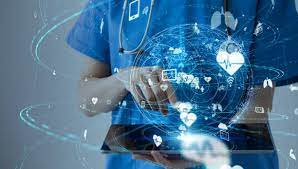

In [ ]:
# Apply the lambda function to check if the values in the 'Gender' column are blank
is_blank = df_sample['Gender'].apply(lambda x: x.strip().isspace())

# Count the number of blank values in the 'Gender' column
num_blank_values = is_blank.sum()

num_blank_values


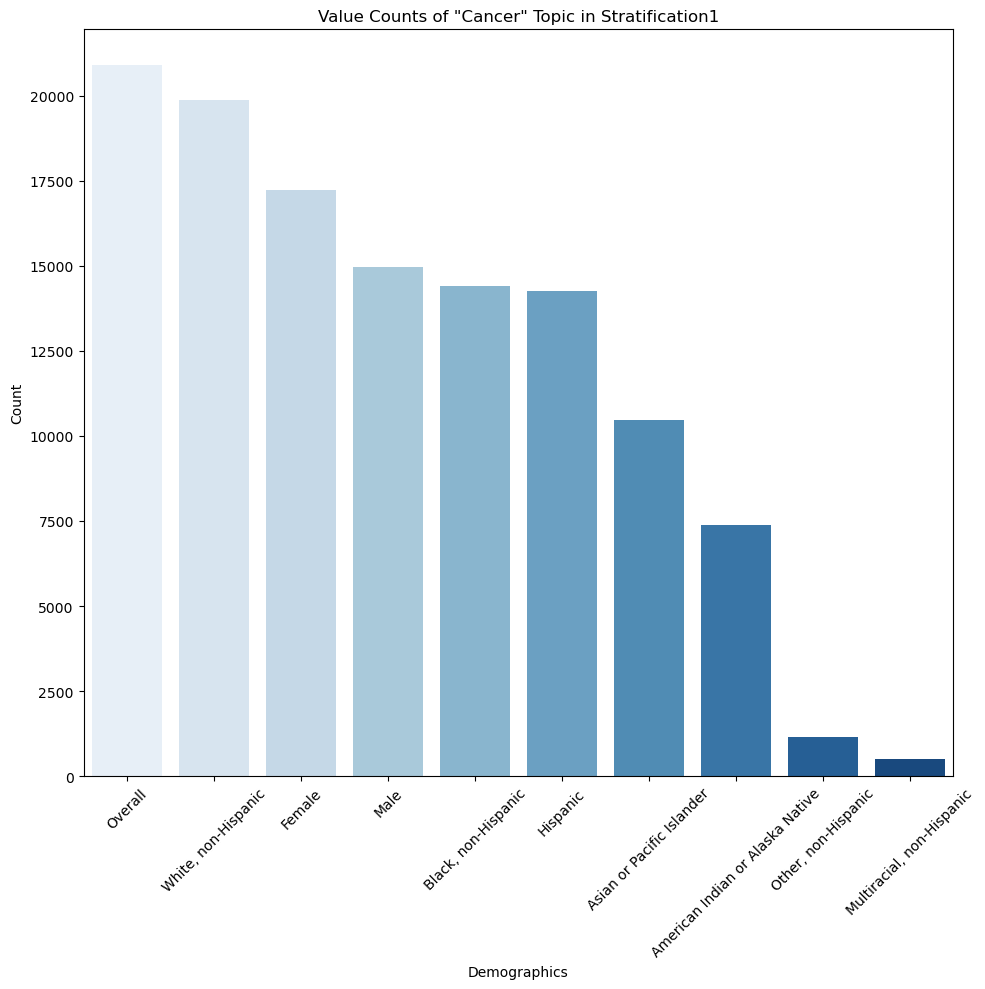

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
# Get the value counts of 'Cancer' topic in the 'Stratification1' column
demographic_value_counts_with_cancer = df_sample[df_sample['Yes_cancer'] == 1]['Demographics'].value_counts()

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 10))
sns.barplot(x=demographic_value_counts_with_cancer.index, y=demographic_value_counts_with_cancer.values, palette='Blues')

# Set labels and title
plt.xlabel('Demographics')
plt.ylabel('Count')
plt.title('Value Counts of "Cancer" Topic in Stratification1')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  
plt.show()


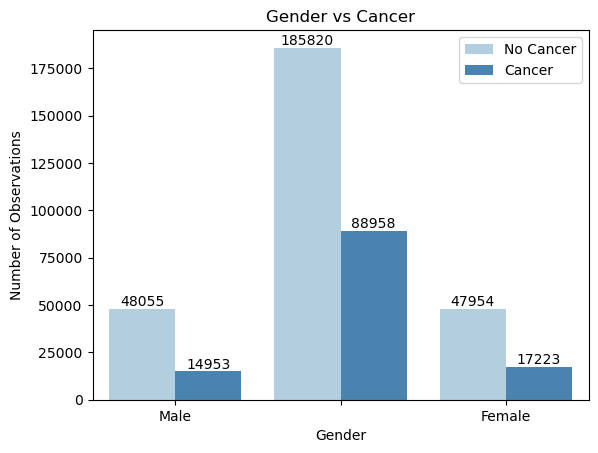

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'df_sample' with the required data
new_labels = {'no cancer': 'No Cancer', 'cancer': 'Cancer'}

# Visualizing the Gender vs Cancer
cg = sns.countplot(data=df_sample, x='Gender', hue='Yes_cancer', palette='Blues')

# Access the legend object
legend = cg.legend()

# Modify the legend labels
legend.get_texts()[0].set_text(new_labels['no cancer'])
legend.get_texts()[1].set_text(new_labels['cancer'])

# # Relabel the x-axis ticks
# plt.xticks(range(len(x)), x)

cg.set_xlabel('Gender')
cg.set_ylabel('Number of Observations')
plt.title('Gender vs Cancer')



# Add count numbers on bars
for p in cg.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()    
    offset = width * 0.02  # Adjust the offset percentage as needed
    cg.annotate(format(height, '.0f'), (x + width / 2., y + height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


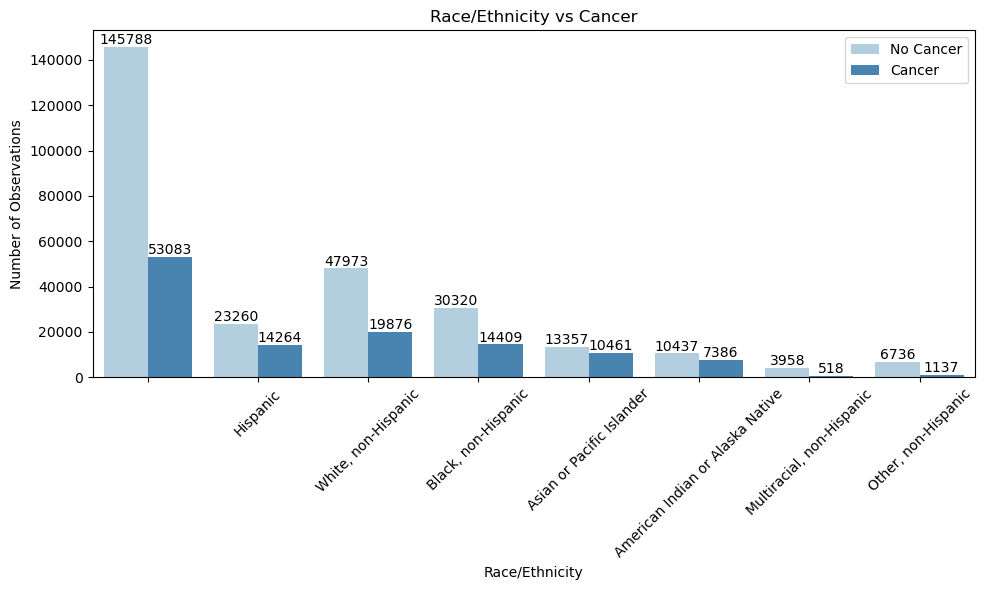

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'df_sample' with the required data
new_labels = {'no cancer': 'No Cancer', 'cancer': 'Cancer'}

# Set a larger figure size
plt.figure(figsize=(10, 6))

# Visualizing the Race/Ethnicity vs Cancer
eg = sns.countplot(data=df_sample, x='Race/Ethnicity', hue='Yes_cancer', palette='Blues')

# Access the legend object
legend = eg.legend()

# Modify the legend labels
legend.get_texts()[0].set_text(new_labels['no cancer'])
legend.get_texts()[1].set_text(new_labels['cancer'])

eg.set_xlabel('Race/Ethnicity')
eg.set_ylabel('Number of Observations')
plt.title('Race/Ethnicity vs Cancer')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add count numbers on bars
for p in eg.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()    
    offset = width * 0.02  # Adjust the offset percentage as needed
    eg.annotate(format(height, '.0f'), (x + width / 2., y + height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Use tight layout
plt.tight_layout()

plt.show()


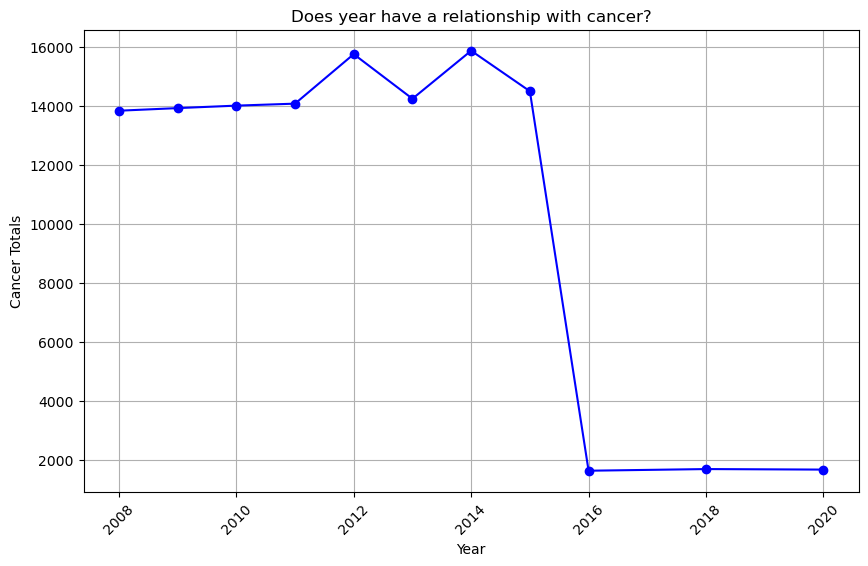

In [72]:
# # Melt the DataFrame to convert 'Year' column into rows

# time_df = df_sample.melt(id_vars='Year', value_vars='Yes_cancer', var_name='CancerCase', value_name='Value')

# # Filter the DataFrame for 'Yes_cancer' values 0 and 1
# filtered_df = time_df[time_df['CancerCase'] == 'Yes_cancer']

# # Create a line plot
# plt.figure(figsize=(10, 6))
# plt.plot(filtered_df[filtered_df['Value'] == 1]['Year'], filtered_df[filtered_df['Value'] == 1]['Value'], marker='o', linestyle='-', color='b', label='Yes_cancer=1')
# plt.plot(filtered_df[filtered_df['Value'] == 0]['Year'], filtered_df[filtered_df['Value'] == 0]['Value'], marker='o', linestyle='-', color='r', label='Yes_cancer=0')
# plt.title('Cancer Cases over the Years')
# plt.xlabel('Year')
# plt.ylabel('Cancer Cases')
# plt.legend()
# plt.grid(True)
# plt.xticks(rotation=45)
# plt.show()

# Filter the DataFrame for rows where 'Yes_cancer' is equal to "1"
filtered_df = df_sample[df_sample['Yes_cancer'] == 1]

# Group by 'Year' and count the number of 'Yes_cancer' occurrences for each year
cancer_totals_by_year = filtered_df.groupby('Year').size()

# Create a time-line graph for the cancer totals over the years
plt.figure(figsize=(10, 6))
plt.plot(cancer_totals_by_year.index, cancer_totals_by_year.values, marker='o', linestyle='-', color='b')
plt.title('Does year have a relationship with cancer?')
plt.xlabel('Year')
plt.ylabel('Cancer Totals')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()



 Overall Cancer rates in US, dropped between 2008 and 2016 due to agressive awareness and rampup in breast cancer screening.
1. Prostate, lung, and colorectal cancers are most common in men, accounting for 42% of cases, with prostate cancer alone responsible for nearly 1 in 5 cases.

2. Breast, lung, and colorectal cancers are prevalent in women, comprising half of all cases, with breast cancer accounting for 30% of new cases.

3. Lung cancer death rates declined 48% in men (1990-2016) and 23% in women (2002-2016). Breast cancer death rates declined 40% (1989-2016), while prostate cancer death rates declined 51% (1993-2016). Colorectal cancer death rates fell 53% (1970-2016), but new cases increased in adults under 55 since the mid-1990s.
 
 https://www.nih.gov/news-events/news-releases/annual-report-nation-overall-cancer-mortality-continues-decline
https://www.cancer.org/research/acs-research-news/facts-and-figures-2019.html